# Simple Moving Average (SMA)

The [SMA filter](https://en.wikipedia.org/wiki/Moving_average#Simple_moving_average) can be used for removing noise from a data set and producing a smoother curve, for example.

## Import the required stuff

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Create a data set

In [2]:
theta = np.linspace(0., 6.*np.pi, 300)

In [8]:
theta_degree = np.rad2deg(theta)

In [9]:
noise_free_data = 5.0*np.cos(theta)

In [10]:
noise = np.random.normal(0., 2.5, theta.size)

In [11]:
noisy_data = noise_free_data + noise

## Plot the data

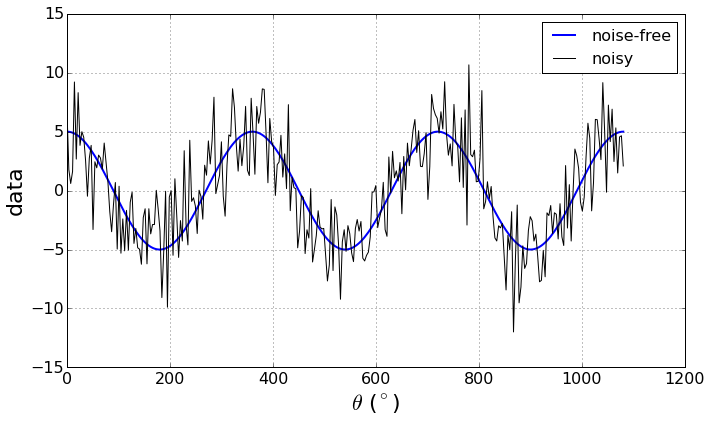

In [16]:
fig = plt.figure(figsize=(10,6))

plt.plot(theta_degree, noise_free_data, '-b', linewidth = 2., label='noise-free')
plt.plot(theta_degree, noisy_data, '-k', label='noisy')

plt.ylabel('data', fontsize = 22)
plt.xlabel('$\\theta$ ($^{\circ}$)', fontsize = 22)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid()

plt.legend(loc='best', fontsize=16)

fig.tight_layout()

plt.show()

In [27]:
def plot(x, y, z = None, labely = None, labelz = None):
    '''Plot two superposed graphs of y against x
    and z against x.
    
    input
    x: numpy array 1D - abscissa values.
    y: numpy array 1D - ordinate values of the first data set.
    z: numpy array 1D - ordinate values of the second data 
       set (default is None).
    labely: string - label of the first data set (default is None).
    labelz: string - label of the second data set (default is None).
    
    output
    matplotlib figure
    '''
    
    fig = plt.figure(figsize=(10,6))

    if labely is not None:
        plt.plot(x, y, '-b', linewidth = 2., label=labely)
    else:
        plt.plot(x, y, '-b', linewidth = 2.)
        
    if z is not None:
        if labelz is not None:
            plt.plot(x, z, '-k', linewidth = 2., label=labelz)
        else:
            plt.plot(x, z, '-k', linewidth = 2.)
    
    plt.ylabel('data', fontsize = 22)
    plt.xlabel('$\\theta$ ($^{\circ}$)', fontsize = 22)

    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    plt.grid()

    plt.legend(loc='best', fontsize=16)

    fig.tight_layout()

    plt.show()    

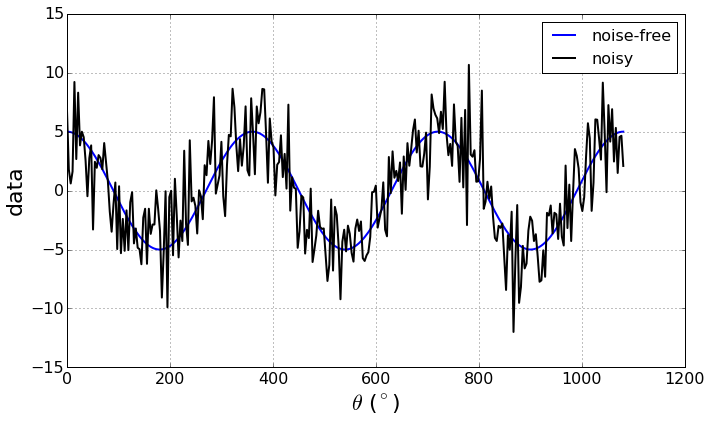

In [29]:
plot(theta_degree, noise_free_data, noisy_data, labely='noise-free', labelz='noisy')

## SMA

In [48]:
window_size = 3

N = noisy_data.size - window_size

i0 = window_size//2

filtered_data = np.empty_like(noisy_data)

filtered_data[0] = 0.
filtered_data[-1] = 0.

for i in range(N):
    filtered_data[i0+i] = np.mean(noisy_data[i:N+i])

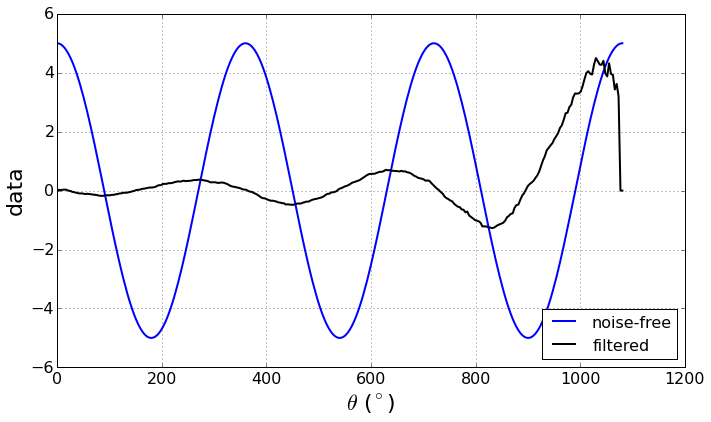

In [49]:
plot(theta_degree, noise_free_data, filtered_data, labely='noise-free', labelz='filtered')